# EDA

In [ ]:
# !pip install opendatasets
# import opendatasets as od

# # Download dataset
# od.download("https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi")

In [ ]:
import io
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Download dataset
coffee = pd.read_csv('/content/df_arabica_clean.csv', index_col=0)

# Remove duplicates data
coffee = coffee.drop_duplicates()

# Show data after drop duplicates and confirm shape
display(coffee.head())
display(coffee.shape)

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


(207, 40)

In [ ]:
# Check data type
display(coffee.info())

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 206
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Farm Name              205 non-null    object 
 3   Lot Number             206 non-null    object 
 4   Mill                   204 non-null    object 
 5   ICO Number             75 non-null     object 
 6   Company                207 non-null    object 
 7   Altitude               206 non-null    object 
 8   Region                 205 non-null    object 
 9   Producer               206 non-null    object 
 10  Number of Bags         207 non-null    int64  
 11  Bag Weight             207 non-null    object 
 12  In-Country Partner     207 non-null    object 
 13  Harvest Year           207 non-null    object 
 14  Grading Date           207 non-null    object 
 15  Owner      

None

In [ ]:
# Check missing values in this each feature
coffee.isnull().sum()

,0
ID,0
Country of Origin,0
Farm Name,2
Lot Number,1
Mill,3
ICO Number,132
Company,0
Altitude,1
Region,2
Producer,1


exploration of raw data
- categorical data

In [ ]:
processing_features = ["Country of Origin", "Farm Name","Mill",
                       "Company", "Altitude", "Region", "Producer",
                       "Number of Bags", "Bag Weight", "Owner", "Variety",
                       "Processing Method", "Color"]

In [ ]:
coffee["Country of Origin"].value_counts()

,count
Country of Origin,
Taiwan,61
Guatemala,21
Colombia,19
Honduras,13
Thailand,12
Ethiopia,11
Brazil,10
Costa Rica,8
Nicaragua,7


<BarContainer object of 10 artists>

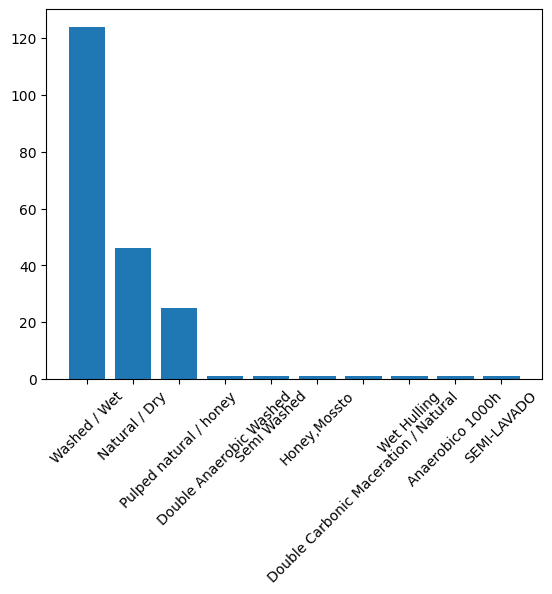

In [ ]:
processing_methods = coffee["Processing Method"].value_counts()
plt.xticks(rotation=45)
plt.bar(processing_methods.index, processing_methods.values)

<BarContainer object of 48 artists>

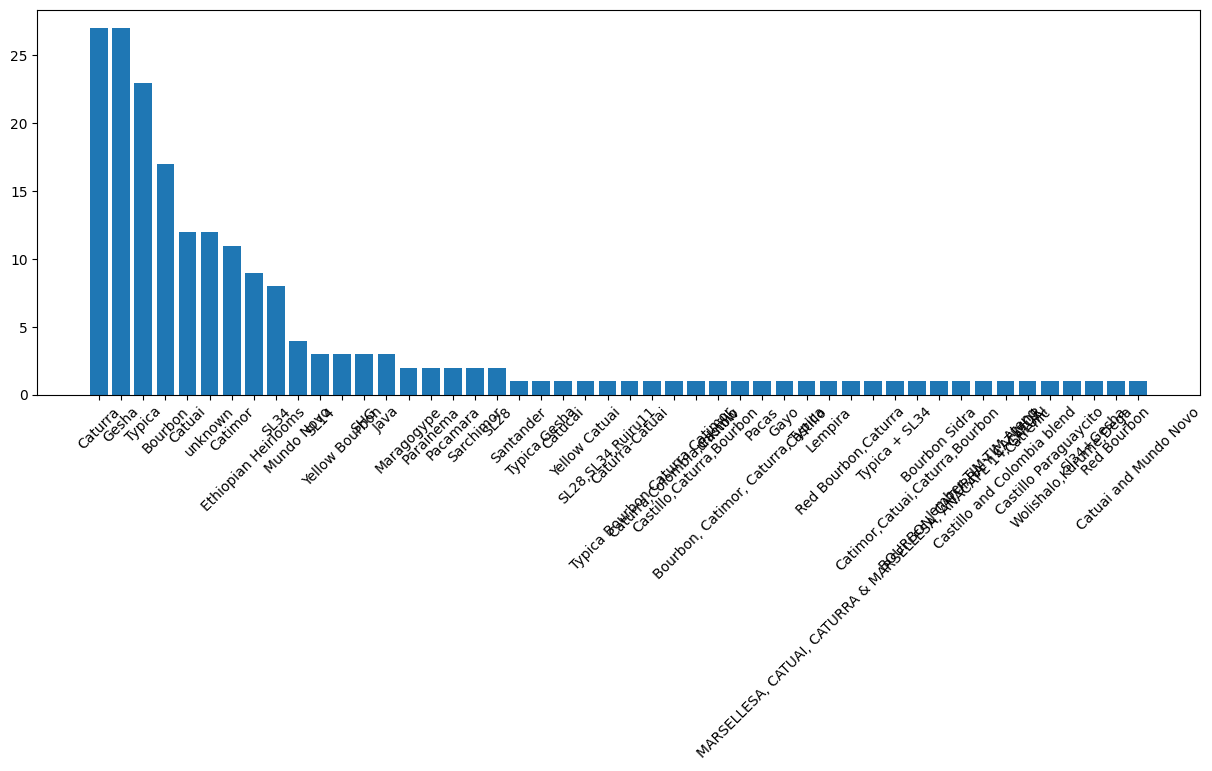

In [ ]:
variety = coffee["Variety"].value_counts()
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.bar(variety.index, variety.values)

<BarContainer object of 12 artists>

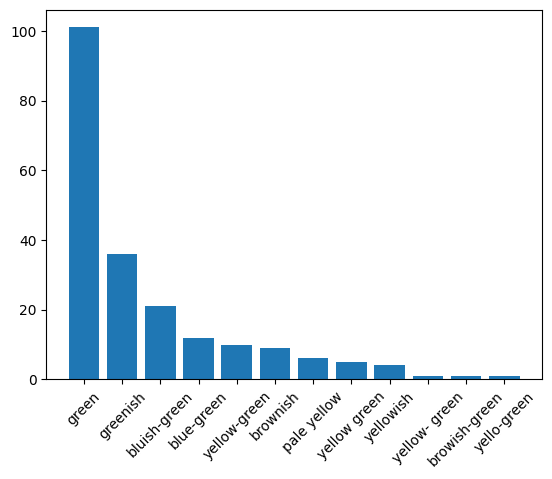

In [ ]:
processing_methods = coffee["Color"].value_counts()
plt.xticks(rotation=45)
plt.bar(processing_methods.index, processing_methods.values)

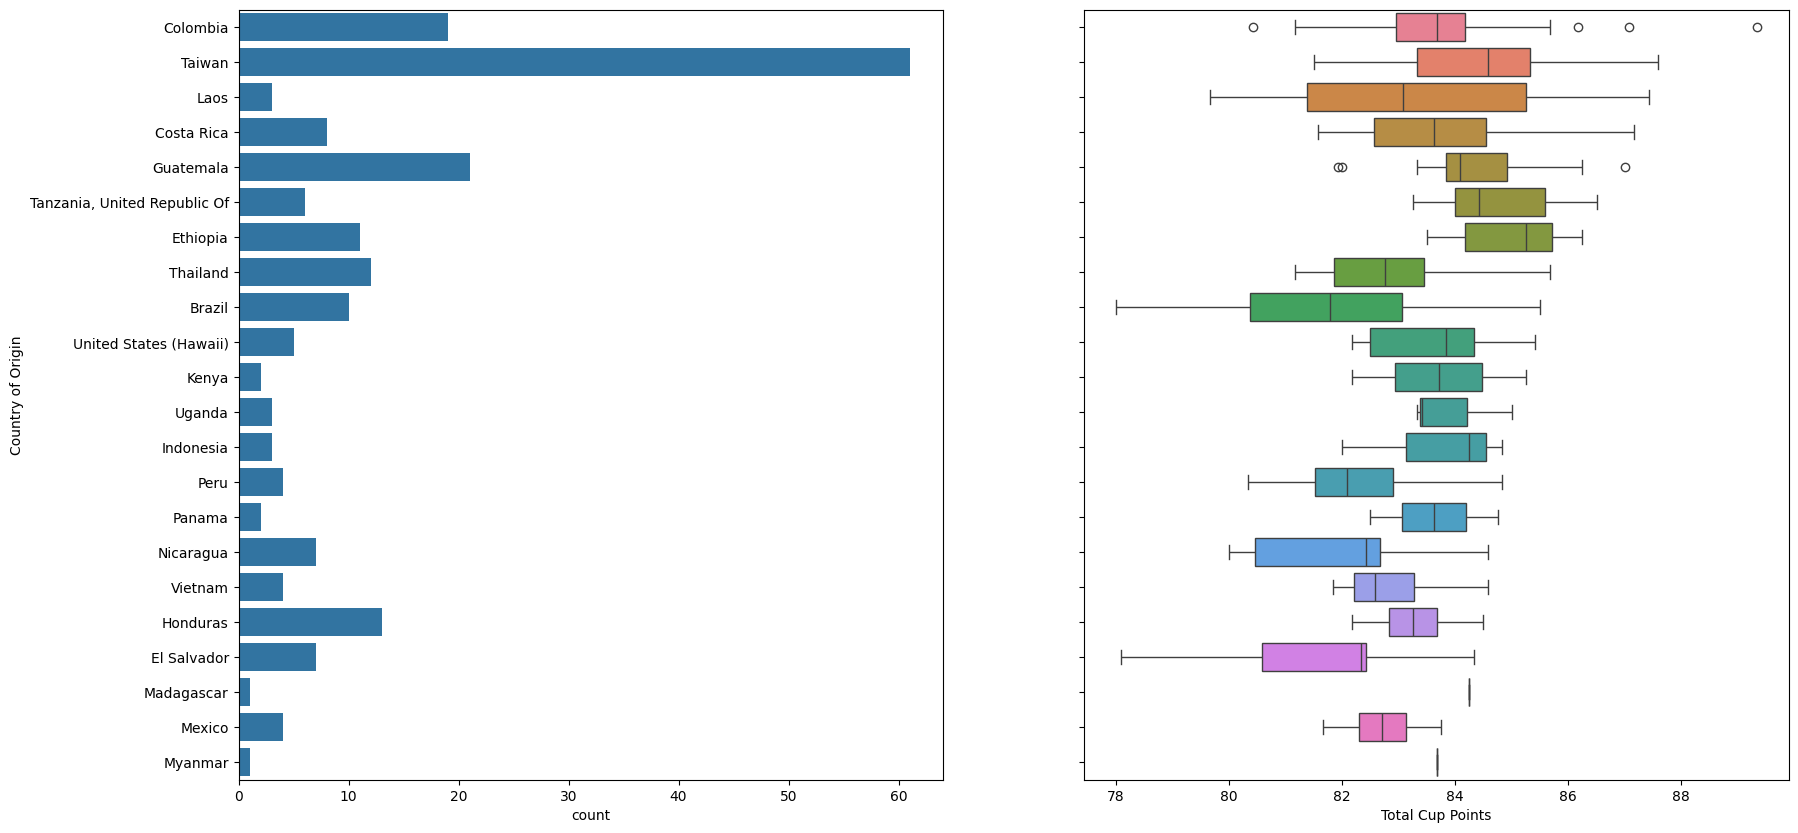

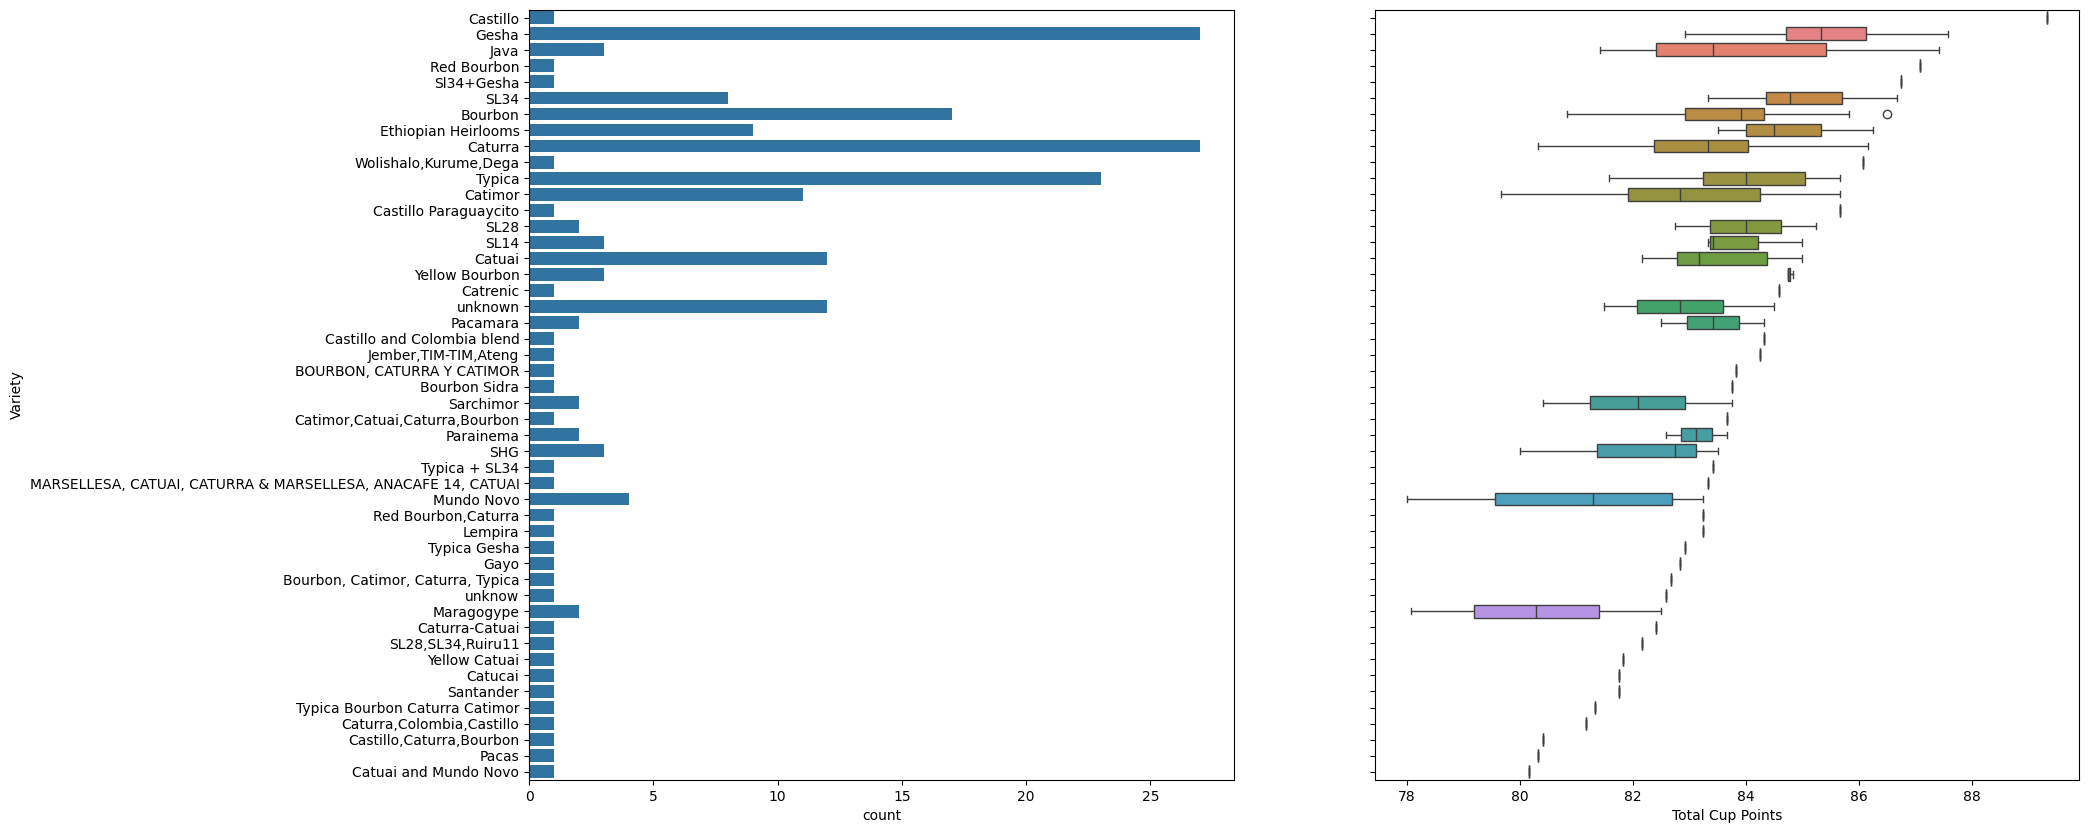

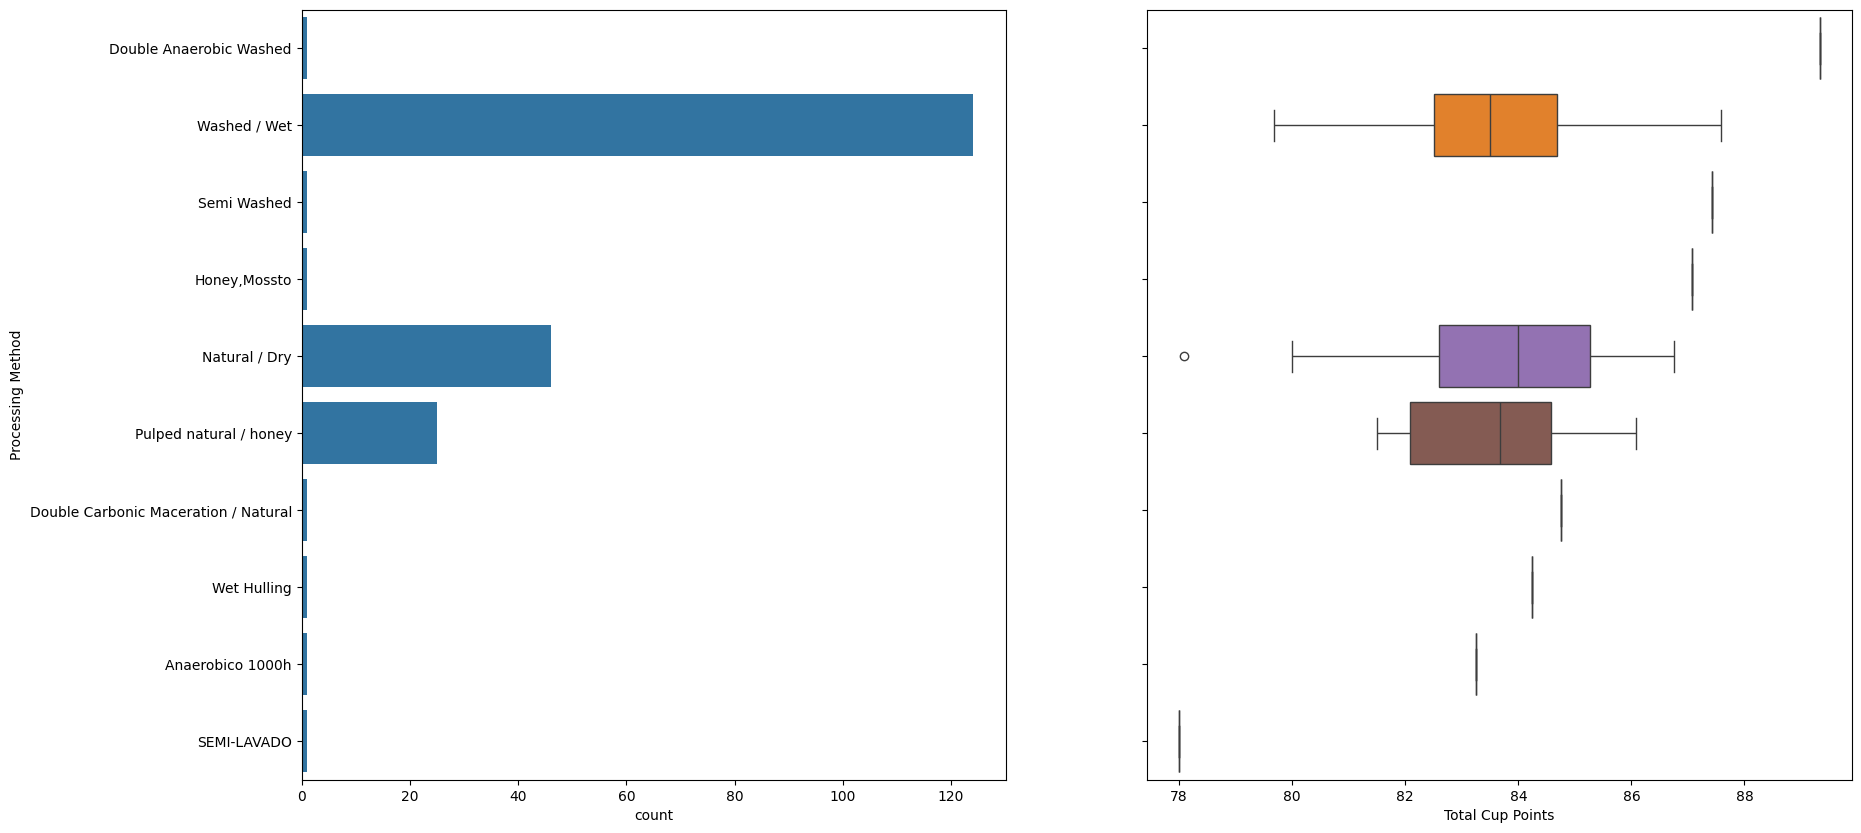

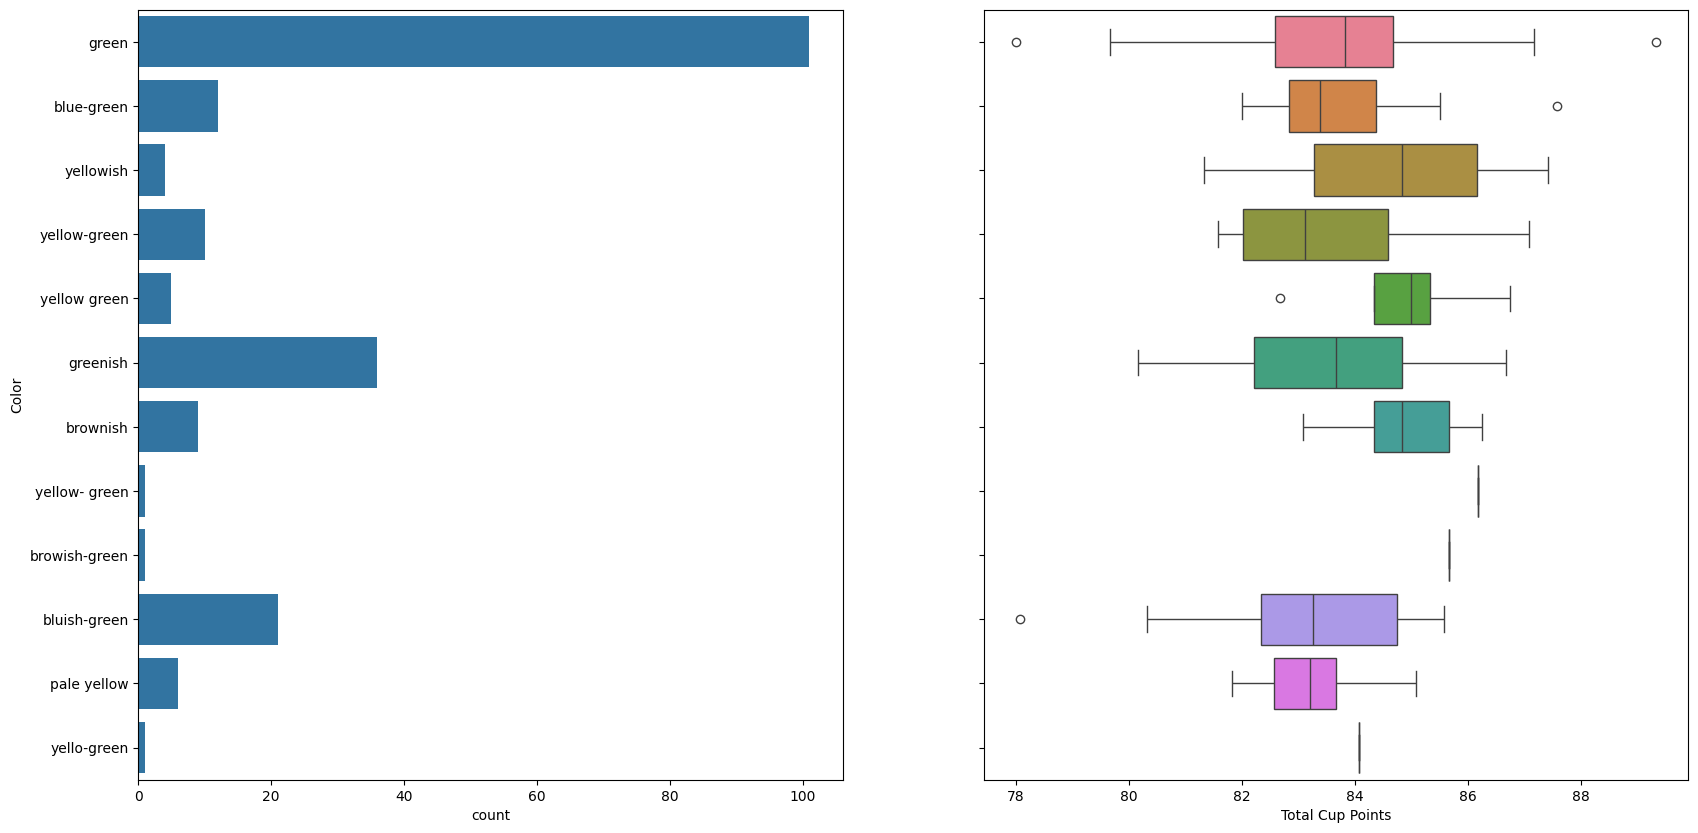

In [ ]:
cate_feat = ['Country of Origin', 'Variety', 'Processing Method', 'Color']

for f, feat in enumerate(cate_feat):
    fig, axs = plt.subplots(1, 2, figsize=(20,10), sharey=True)
    sns.countplot(data=coffee, y=feat, ax=axs[0], orient='y')
    sns.boxplot(data=coffee, x='Total Cup Points', y=feat, hue=feat, ax=axs[1], legend=False)
    plt.show()

# Categorical features appear imbalanced and some data have too much different size
# However, I try to extract some trends with some features in which the number of null is 0 in dataset such as Country of Origin

- numerical data

In [ ]:
quality_features = ["Aroma", "Flavor", "Aftertaste", "Acidity",
                    "Body", "Balance", "Uniformity", "Clean Cup", "Sweetness", "Overall",
                    "Defects", "Total Cup Points", "Moisture Percentage", "Category Two Defects",
                    "Quakers", "Category Two Defects"]

coffee[quality_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,207.0,7.721063,0.287626,6.50,7.58,7.67,7.920,8.58
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00
Clean Cup,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Sweetness,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Overall,207.0,7.676812,0.306359,6.67,7.50,7.67,7.920,8.58


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category Two Defects,Quakers,Category Two Defects
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,3,0,3
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,0
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,2,0,2
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,0
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,2,2,2


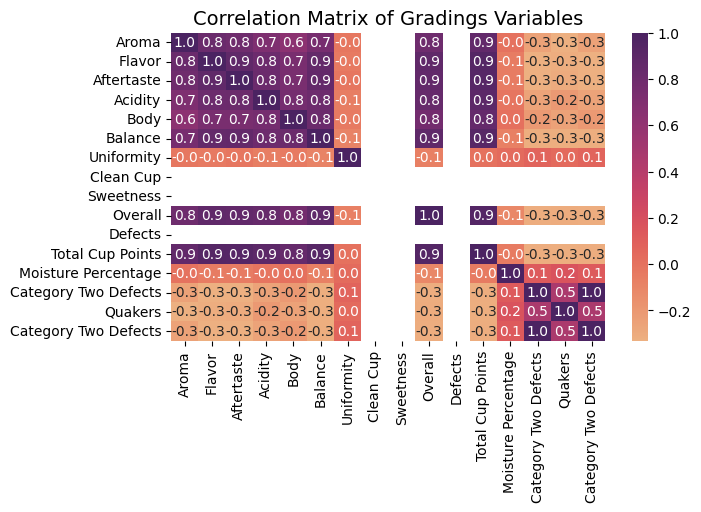

In [ ]:
gradings = coffee[quality_features]
display(gradings.head())

fig, ax = plt.subplots(1, 1, figsize=(7,4))
sns.heatmap(data=gradings.corr(), cmap='flare', robust=True, fmt='.1f', annot=True, ax=ax)
ax.set_title('Correlation Matrix of Gradings Variables', fontsize=14)

plt.show()

# As table below, I think some features not impact to find coffee quality
# - Assume clean cup, Sweetness, Defects, Unifomity are not good to use for input data
#   because all value are same, it's might be have no meaning with this dataset
# - Assume Moisture Percentage, Category Two Defects, Quakers, Category Two Defects are not
#   to much correlation to use with total cup point

Aroma         0.868919
Flavor        0.939124
Aftertaste    0.934813
Acidity       0.897057
Body          0.847216
Balance       0.929520
Overall       0.947217
dtype: float64


<Axes: title={'center': 'Correlation with Coffee Quality'}>

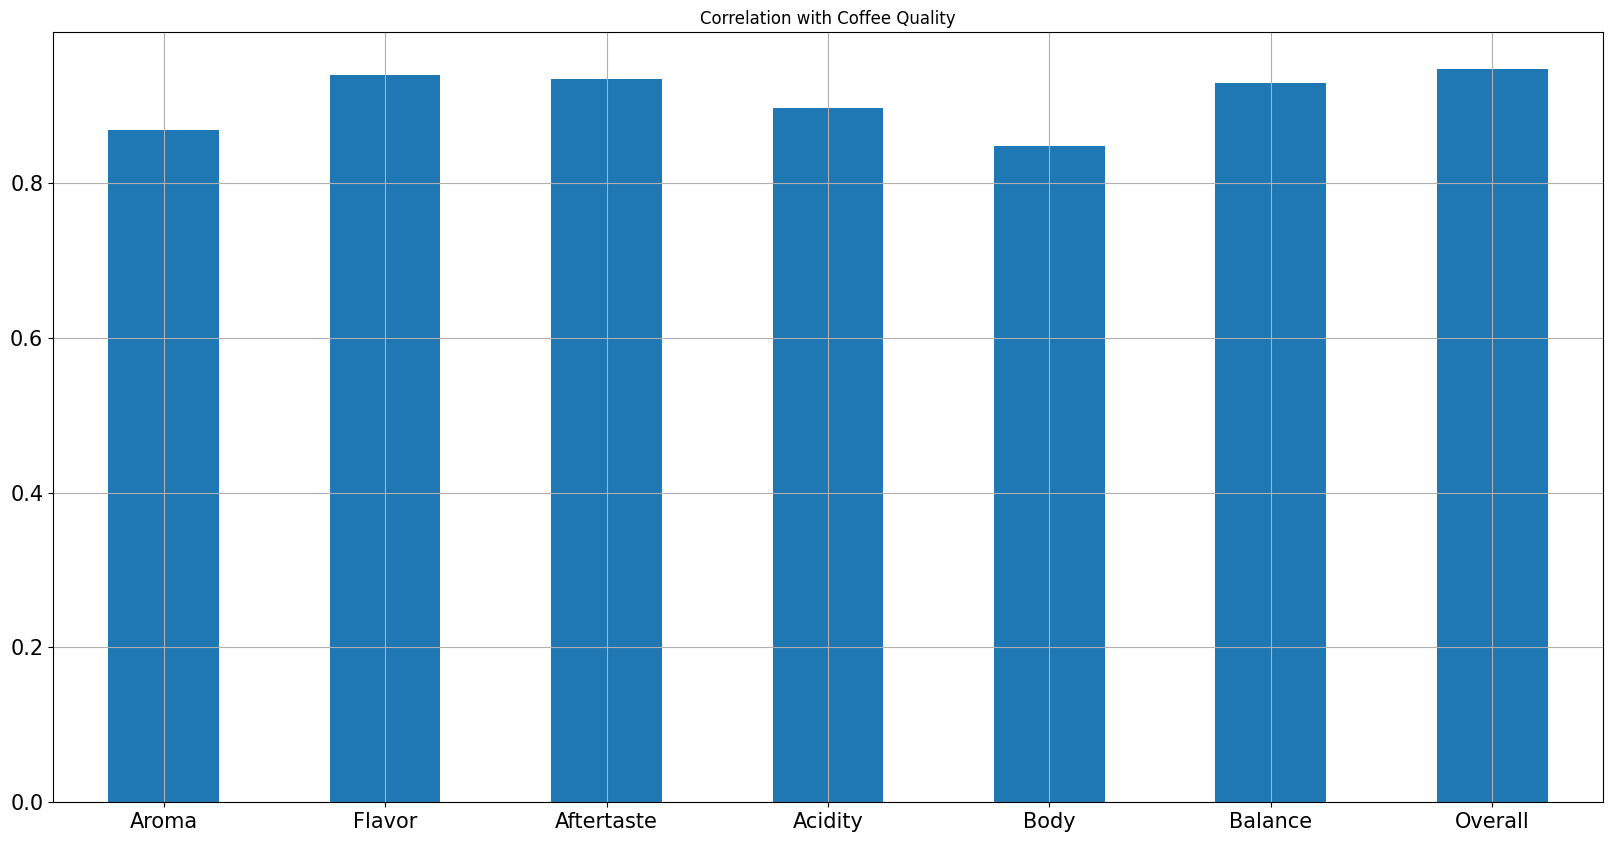

In [ ]:
df_num_features = coffee[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall']]
df_corr_num_feat = df_num_features.corrwith(coffee['Total Cup Points'])
print(df_corr_num_feat)
df_corr_num_feat.plot.bar(figsize = (20, 10),
                          title = "Correlation with Coffee Quality",
                          fontsize = 15,rot = 0, grid = True)

# Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import ShuffleSplit, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

from sklearn.linear_model import SGDRegressor, LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

- Preprocessing

In [ ]:
# Seleted feature to be input model
data = coffee[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Country of Origin', 'Total Cup Points']].dropna(how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              207 non-null    float64
 1   Flavor             207 non-null    float64
 2   Aftertaste         207 non-null    float64
 3   Acidity            207 non-null    float64
 4   Body               207 non-null    float64
 5   Balance            207 non-null    float64
 6   Overall            207 non-null    float64
 7   Country of Origin  207 non-null    object 
 8   Total Cup Points   207 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.2+ KB


In [ ]:
# Use 'Total Cup Points' to be target (y)
target = data['Total Cup Points']
features = data.drop('Total Cup Points', axis=1)

# Use other to be feature (x), that have 2 types of data are numerical and object
numerical_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall']
categorical_columns = ['Country of Origin']

In [ ]:
# During the preprocess step, 2 transformers are used:
# - OneHotEncoder for applied to object columns
# - StandardScaler for applied to numerical columns which show a normal distribution

one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
standard_scaler = StandardScaler()
preprocessor =ColumnTransformer(
    transformers=[
        ("one_hot_encoder", one_hot_encoder, categorical_columns),
        ("standard_scaler", standard_scaler, ['Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall'])
        ])

preprocessor

ColumnTransformer(transformers=[('one_hot_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Country of Origin']),
                                ('standard_scaler', StandardScaler(),
                                 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity',
                                  'Body', 'Balance', 'Overall'])])

- Model

In [ ]:
def nested_cross_validation(model, param_grid, cv_results, inner_cv, out):

    ml_model = GridSearchCV(model, param_grid, cv=inner_cv)
    ml_pipeline = make_pipeline(preprocessor, ml_model)

    results = cross_validate(ml_pipeline, features, target, cv=inner_cv,
                             scoring=["neg_mean_absolute_error",
                                      "neg_mean_squared_error",
                                      "neg_root_mean_squared_error",
                                      "r2"],
                             return_estimator=True)

    cv_results.append({'model': f'{model}'[:-2],
                        'mae': -results["test_neg_mean_absolute_error"].mean(),
                        'mse': -results["test_neg_mean_squared_error"].mean(),
                        'rmse': -results["test_neg_root_mean_squared_error"].mean(),
                        'r2': results["test_r2"].mean(),
                        })

    # Print best parameters.
    idx = np.where(results['test_r2'] == results['test_r2'].max())[0][0]
    params = results['estimator'][idx].get_params()

    # Stored result in 'out'.
    out.append(f'> {model} model - Best hyperparameters:')
    for param in param_grid.keys():
        value = params[f'gridsearchcv__estimator__{param}']
        out.append(f'    - {param}: {value}')

In [ ]:
# Split dataset for train and test
inner_cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv_param_results, out = [], []

In [ ]:
# Hyperparameters tuning each model

# LinearRegression
linear_param = {'fit_intercept': [True, False]}
nested_cross_validation(LinearRegression(), linear_param, cv_param_results, inner_cv, out)

# Ridge
ridge_param = {'alpha': np.logspace(-2,2,5)}
nested_cross_validation(Ridge(), ridge_param, cv_param_results, inner_cv, out)

# SGD
sgd_param = {'alpha': np.logspace(-2,2,5)}
nested_cross_validation(SGDRegressor(), sgd_param, cv_param_results, inner_cv, out)

# ElasticNet
elasticnet_param = {'alpha': np.logspace(-2,2,5),
                    'l1_ratio': np.linspace(0.1, 0.9, 3)}
nested_cross_validation(ElasticNet(), elasticnet_param, cv_param_results, inner_cv, out)

# Lasso
lasso_param = {'alpha': np.logspace(-2,2,5)}
nested_cross_validation(Lasso(), lasso_param, cv_param_results, inner_cv, out)

# KNeighborsRegressor
kneigh_param = {'n_neighbors': np.linspace(2, 10, 4, dtype=int)}
nested_cross_validation(KNeighborsRegressor(), kneigh_param, cv_param_results, inner_cv, out)

# DecisionTreeRegressor
dectree_param = {'max_depth': list(range(2, 22, 10)),
                 'min_samples_leaf': list(range(2, 7, 2))
                 }
nested_cross_validation(DecisionTreeRegressor(), dectree_param, cv_param_results, inner_cv, out)

# GradientBoostingRegressor
grad_param = {'learning_rate': np.logspace(-1,1,3, dtype=int)}
nested_cross_validation(GradientBoostingRegressor(), grad_param, cv_param_results, inner_cv, out)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

In [ ]:
# Sort result to confirm accuracy score
summary_param = pd.DataFrame.from_dict(cv_param_results).sort_values('r2', ascending=False).set_index('model')
summary_param

# As below table, ElasticNet is the best models, achieving very high accuracy

,mae,mse,rmse,r2
model,,,,
ElasticNet,0.023638,0.000918,0.029374,0.999691
Lasso,0.024033,0.000938,0.030088,0.999674
Ridge,0.026453,0.001152,0.033116,0.999607
LinearRegression,0.028105,0.001270,0.034832,0.999566
KNeighborsRegressor,0.204417,0.104746,0.310895,0.964742
GradientBoostingRegressor,0.339659,0.224204,0.458363,0.924166
DecisionTreeRegressor,0.339654,0.234905,0.466792,0.915428
SGDRegressor,10.432132,229.316730,14.834385,-85.616420


In [ ]:
# Confirm best parameter of each model.
for x in out:
    print(x)

> LinearRegression() model - Best hyperparameters:
    - fit_intercept: True
> Ridge() model - Best hyperparameters:
    - alpha: 1.0
> SGDRegressor() model - Best hyperparameters:
    - alpha: 0.0001
> ElasticNet() model - Best hyperparameters:
    - alpha: 1.0
    - l1_ratio: 0.5
> Lasso() model - Best hyperparameters:
    - alpha: 1.0
> KNeighborsRegressor() model - Best hyperparameters:
    - n_neighbors: 5
> DecisionTreeRegressor() model - Best hyperparameters:
    - max_depth: None
    - min_samples_leaf: 1
> GradientBoostingRegressor() model - Best hyperparameters:
    - learning_rate: 0.1


In [ ]:
# Actually for used data in step model preprocessing, I would try with other feature like Color, Variety, Processing Method
# but after confirm the accurency score, the result is not better than upper result
# I think that categorical columns have null values and the data size of each type is imbalance so not meaning to much in model.
# Additionally, in this dataset, total data is quite small so I assume no need remove that feature and use other feature is might OK.